#### Eirik Høyheim - STK4021 - Assignment number 1

# The children of Odin

* $N$ = total number of children Odin had
* $y$ = number of boys

We are given that

$$y \sim Bin(N, p_0)$$

where $p_0=0.515$ and $N$ is unknown.

## (a)

_Put up the likelihood function, for the unknown $N$, with the given $y=6$_.

The likelihood function will be the pdf of a binomial:

$$L(y|N) = \frac{N!}{y!(N-y)!} p_0^y(1-p_0)^{N-y} = \frac{N!}{6!(N-6)!} 0.515^6 (1-0.515)^{N-6}$$

_What is the maximum likelihood estimate?_

Since we are dealing with discrete values (and not continuous) we need to find the mode of our likelihood function 

In [1]:
import numpy as np
import scipy.stats as stats

N = np.arange(0, 100, 1)
y = 6
p0 = 0.515

probs = stats.binom.pmf(y,N,p0)
highest_prob = np.argmax(probs)

print(f"MLE: {N[highest_prob]}")

MLE: 11


Even though this is not a problem with continuous, we can still find the MLE (Maximum Likelihood Estimate) by minimizing the negative likelihood function. But we need to keep in mind that Odin can't have 0.5 children (need whole numbers): 

In [2]:
import scipy.optimize as opti

def likelihood(N):
    '''
    Likelihood function of N
    '''
    return stats.binom.pmf(y, N, p0)

def minusLikelihood(N):
    '''
    Minus likelihood to make it possible to
    minimize our function, instead of maximazing
    '''
    return -likelihood(N)

optimal_param = opti.minimize(minusLikelihood, 8)
print(optimal_param["x"])

[11.13958852]


By minimizing the negative likelihood function, I found that $\hat{N}_{ML} = 11.14 \approx 11$.

## (b)

_Find and portray the posterior distribution for the number of Odin's children._

We are given the prior:

$$\pi_0(N) = c \cdot \frac{1}{N+1} \propto \frac{1}{N+1}$$

where $N=0, 1, ..., 50$ and $c$ (a constant) is unknown. 

In [3]:
N_max = 50  # given in assignment
N_val = np.arange(0, N_max+1, 1)  # N=0,1,...,50
p0 = 0.515  # prob for boy
y = 6  # odins 6 son's
uprior = 1/(N_val+1)  
const_prior = sum(uprior)
prior = uprior/const_prior  # the prior distribution

__Posterior distribution__:

The likelihood function is found in __(a)__:

$$L(y|N) = \frac{N!}{y!(N-y)!} p_0^y (1-p_0)^{N-y} = \frac{\Gamma(N+1)}{\Gamma(y+1)\Gamma(N-y+1)} p_0^y (1-p_0)^{N-y}$$

We are given that $y$ (number of boys) is $6$. We are also given that the probability of boy ($p_0$: prob of $y$) is $0.515$ (the scandinavian probability)

The posterior function is:

\begin{align*}
\pi (N|y) &= \pi_0(N) \cdot L(y|N) \\
&= c \cdot \frac{1}{N+1} \frac{p_0^y}{(1-p_0)^y \Gamma(y+1)} \frac{\Gamma(N+1)}{\Gamma(N-y+1)} (1-p_0)^N \\
&= c_{post} \cdot \frac{1}{N+1} \frac{\Gamma(N+1)}{\Gamma(N-y+1)} (1-p_0)^N \quad \text{ for } N= 6, 7, ..., 50
\end{align*}

Here, $c_{post}$ is another constant that is unknown, but that does not stop me from approximating the posterior. First I calculate what I already know about the posterior (the prior and the likelihhod function without the constant), then I use that information to find $c_{post}$ and the posterior distribution:

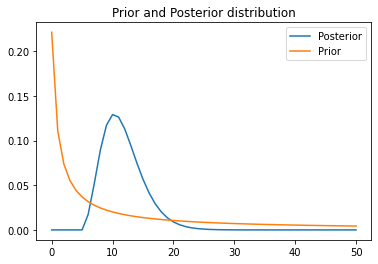

In [4]:
import matplotlib.pyplot as plt
from scipy.special import gamma as g  # import gamma function as g
upost1 = prior * (g(N_val+1)/g(N_val-y+1))*(1-p0)**N_val *(N_val >= y)
const1 = np.sum(upost1)
post1 = upost1/const1  # the posterior distribution

plt.plot(N_val, post1, label="Posterior")
plt.plot(N_val, prior, label="Prior")
plt.legend()
plt.title("Prior and Posterior distribution")
plt.show()

_What is the 90% credibility intervall for N?_

In [5]:
cum_prior = np.cumsum(prior)
cum_post1 = np.cumsum(post1)
# low represent the 5% quantile, while high represent the 95% quantile
low_prior, mid_prior, high_prior = min(N_val[cum_prior >= 0.05]), min(N_val[cum_prior >= 0.5]), min(N_val[cum_prior >= 0.95])
low_post1, mid_post1, high_post1 = min(N_val[cum_post1 >= 0.05]), min(N_val[cum_post1 >= 0.5]), min(N_val[cum_post1 >= 0.95])
print(f"Prior 90% credibility interval (low, mid, high):\n{low_prior, mid_prior, high_prior}\n")
print(f"Posterior 90% credibility interval (low, mid, high):\n{low_post1, mid_post1, high_post1}")

Prior 90% credibility interval (low, mid, high):
(0, 4, 40)

Posterior 90% credibility interval (low, mid, high):
(7, 11, 18)


## (c) 

_Find your own prior!_

Here I can choose between multiple distributions, e.g. I could try a geometric distribution with mean 5 (I belived that the average number of children where around 5 when Odin was alive):

$$p_{\text{own prior}}(N) = (1-p_1)^Np_1$$

where $N = 0, 1, ...$ and $p_1 = \frac{1}{5}$. 

The posterior distribution will then be:

\begin{align*}
 \pi_{\text{own post}} (N|y) &= p_{\text{own prior}} \cdot L(y|N) \\
 &= c_{\text{own post}} \cdot (1-p_1)^Np_1 \frac{\Gamma(N+1)}{\Gamma(N-y+1)} (1-p_0)^N
\end{align*}

_Compute and display the resulting posterior distribution, alongside the previous one._

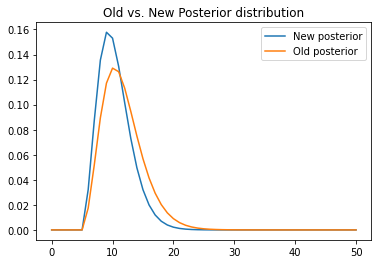

In [6]:
# own prior distribution
own_prior = (1-1/5)**N_val * 1/5
# own posterior distribution
own_upost = own_prior * (g(N_val+1)/g(N_val-y+1))*(1-p0)**N_val *(N_val >= y)
own_const = np.sum(own_upost)
own_post = own_upost/own_const

plt.plot(N_val, own_post, label="New posterior")
plt.plot(N_val, post1, label="Old posterior")
plt.legend()
plt.title("Old vs. New Posterior distribution")
plt.show()

From the figure above, it's clear that the two distributions are somewhat close to eachother, meaning that there is aproximatly the same posterior distribution. The posterior with my own prior (New posterior) is a bit "sharper" than the Old posterior, meaning that the posterior with my prior is a bit more confident of its answer than the old one.

## (d)

_Comment on the assumptions underlying the calculations here._

When calculating my own prior distribution I assumed that the probability of getting $N$ children was i.i.d. geometrically distributed with mean 5. I also assumed that the probability of getting one more child is independent of how many children that one allready have.

# Decision A, or B, or C?

Consider the square root distribuiton for independent nonnegative observations $y_1, \cdots , y_n$ with density

#### $$f(y|\theta) = \frac{\theta}{2\sqrt{y}} e^{-\theta \sqrt{y}}$$

where $\theta$ is an unknown positiv parameter.

## (a)

_Show that $f(y|\theta)$ indeed is a density, for each given $\theta$._

For $f(y|\theta)$ to be a density, it has to satisfy two conditions:

1. $0 \leq f(y|\theta)$, for all $y>0$
2. $\int_{i=0}^{\infty} f(y|\theta) dy = 1$

Condition 1 holds, because as $y \rightarrow \infty$, the function will be 0, and when $y \rightarrow 0$, the function will go to $\infty$. And as $\theta \rightarrow -\infty$ and when $\theta \rightarrow \infty$, the function will go to $\infty$. So, condition 1 holds.

Condition 2 can be checked by integrating:

\begin{align*}
\int_{0}^{\infty} f(y|\theta) dy &= \int_{0}^{\infty} \frac{\theta}{2 \sqrt{y}} e^{-\theta \sqrt{y}} dy \\
&= \frac{\theta}{2} \int_{0}^{\infty} y^{-1/2} e^{-\theta y^{1/2}} dy, \quad u=-\theta y^{1/2} \rightarrow dy = -\frac{du}{\frac12 \theta y^{-1/2}} \\
&= -\frac{\theta}{2} \int_{0}^{\infty} y^{-1/2} \frac{du}{\frac12 \theta y^{-1/2}} \\
&= -\frac{\theta}{2} \frac{2}{\theta} \int_{0}^{\infty} e^u du \\
&= -\left[e^u \right]_0^{\infty} \quad u=-\theta y^{1/2} \\
&= -\left[e^{-\infty} - e^{0}\right] \\
&= 1
\end{align*}

Both conditions holds $\Rightarrow$ $f(y|\theta)$ is a density for each given $\theta$.

_Write down the likelihood function for the observed data, and find the maximum likelihood estimator._

Likelihood function:

\begin{align*}
L(\theta|y) &= \prod_{i=1}^n f(y_i|\theta) \\
&= \prod_{i=1}^n \frac{\theta}{2\sqrt{y_i}} e^{-\theta \sqrt{y_i}}, \quad \text{ log transformation} \\
l(\theta|y) &= \sum_{i=1}^n \left[log(\theta) - log(2) - \frac12 log(y_i) - \theta \sqrt{y_i} \right] \\
&= n \cdot log(\theta) -  n \cdot log(2) - \frac12 \sum_{i=1}^n log(y_i) - \theta \sum_{i=1}^n y_i^{1/2}
\end{align*}

Maximum likelihood estimator:

\begin{align*}
 \frac{d}{d \theta} l(\theta) &= \frac{d}{d \theta} \left[n \cdot log(\theta) -  n \cdot log(2) - \frac12 \sum_{i=1}^n log(y_i) - \theta \sum_{i=1}^n y_i^{1/2}  \right] \\
 0 &= \frac{n}{\theta} - \sum_{i=1}^n y_i^{1/2} \\
 \frac{n}{\theta} &= \sum_{i=1}^n y_i^{1/2} \\
 \hat{\theta} &= \frac{n}{\sum_{i=1}^n y_i^{1/2}} = \frac{1}{w_n}, \quad \text{where } w_n = \left( \frac1n \right)\sum_{i=1}^n y_i^{1/2}
\end{align*}

Need to check if a maximum. If it is a maximum then $\frac{d^2}{d\theta^2} l(\theta)$ will be negative:

\begin{align*}
 \frac{d^2}{d\theta^2} l(\theta) &= -\frac{n}{\theta^2}
\end{align*}

which is negative for all values of $\theta$ and $n\geq 0$.

## (b)

_Assume $\theta$ is a Gamma prior, with parameters (a,b). Find the posterior distribution for $\theta$._

Prior:

$$p(\theta) = \frac{b^a}{\Gamma(a)} \theta^{a-1}e^{-b\theta}$$

Likelihood:

$$L(\theta|y) = \prod_{i=1}^n \frac{\theta}{2\sqrt{y_i}} e^{-\theta \sqrt{y_i}} = \frac{\theta^n}{\prod_{i=1}^n 2\sqrt{y_i}} e^{-\theta \sum_{i=1}^n \sqrt{y_i}}$$

Posterior:

\begin{align*}
 \pi(\theta|y) &= prior \cdot likelihood \\
 &= \frac{b^a}{\Gamma(a)} \theta^{a-1} e^{-b\theta} \frac{\theta^n}{\prod_{i=1}^n 2\sqrt{y_i}} e^{-\theta \sum_{i=1}^n \sqrt{y_i}} \\
 &= \frac{b^a}{\Gamma(a)} \frac{1}{\prod_{i=1}^n 2\sqrt{y_i}} \theta^{a+n-1} e^{-\theta\left(b+\sum_{i=1}^n \sqrt{y_i} \right)} \\
 &\propto \theta^{a+n-1} e^{-\theta\left(b+\sum_{i=1}^n \sqrt{y_i} \right)}
\end{align*}

which resembles a Gamma distribution with $a_{new} = a+n$ and $b_{new} = b + \sum_{i=1}^n \sqrt{y_i}$. So, the posterior distribution is:

$$\theta | y \sim Gamma(a+n, b + \sum_{i=1}^n \sqrt{y_i})$$

## (c)

_Assume $\theta$ has a Gamma prior with carefully set parameters (4.4, 2.2), and we have observed twelve costly data points. Display the prior and the posterior densities in a diagram._

I will use the posterior distribution obtained in __(b)__ and Python to acquire the density diagrams:

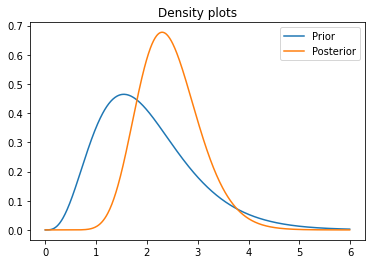

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# observed data
y_obs = [0.771, 0.140, 0.135, 0.007, 0.088, 0.008, 0.268, 0.022, 0.131, 0.142, 0.421, 0.125]
# prior belives
a = 4.4
b = 2.2 
# posterior update
a_new = a + len(y_obs)
b_new = b + np.sum([np.sqrt(yi) for yi in y_obs])
theta_val = np.arange(0.00, 6, 0.01)
prior = stats.gamma.pdf(theta_val, a=a, scale=1/b)
post = stats.gamma.pdf(theta_val, a=a_new, scale=1/b_new)
plt.plot(theta_val, prior, label="Prior")
plt.plot(theta_val, post, label="Posterior")
plt.legend()
plt.title("Density plots")
plt.show()

_Compute the probabilities $p_1, p_2, p_3$ for prior and then for the posterior._

Probabilities $p_1 = Pr(0<\theta < 1.50)$, $p_2 = Pr(1.50<\theta < 3.00)$ and $p_3 = Pr(3.00<\theta < \infty)$, for both prior and posterior:

In [8]:
# prior
p1_prior = stats.gamma.cdf(1.5, a=a, scale=1/b)
p2_prior = stats.gamma.cdf(3.0, a=a, scale=1/b) - stats.gamma.cdf(1.5, a=a, scale=1/b)
p3_prior = stats.gamma.sf(3.0, a=a, scale=1/b)
# posterior
p1_post = stats.gamma.cdf(1.5, a=a_new, scale=1/b_new)
p2_post = stats.gamma.cdf(3.0, a=a_new, scale=1/b_new) - stats.gamma.cdf(1.5, a=a_new, scale=1/b_new)
p3_post = stats.gamma.sf(3.0, a=a_new, scale=1/b_new)
print(f"Probabilities for prior distribution:\np1: {round(p1_prior, 5)}\np2: {round(p2_prior, 5)}\np3: {round(p3_prior, 5)}\n")
print(f"Probabilities for posterior distribution:\np1: {round(p1_post, 5)}\np2: {round(p2_post, 5)}\np3: {round(p3_post, 5)}\n")

Probabilities for prior distribution:
p1: 0.33992
p2: 0.5169
p3: 0.14318

Probabilities for posterior distribution:
p1: 0.04006
p2: 0.78416
p3: 0.17578



## (d)

Loss function, associated with future costs, in annual million kroner:

\begin{align*}
L(\theta, A) &= 
\begin{cases} 
    0, \quad \text{ if } \theta \leq 1.50 \\
    1, \quad \text{ if } \theta > 1.50
  \end{cases} \\
L(\theta, B) &= 
\begin{cases} 
    0, \quad \text{ if } \theta \in  (1.50, 3.00) \\
    2, \quad \text{ if } \theta \notin (1.50, 3.00)
  \end{cases} \\
L(\theta, C) &= 
\begin{cases} 
    0, \quad \text{ if } \theta > 3.00 \\
    3, \quad \text{ if } \theta \leq 3.00
  \end{cases}
\end{align*}

* A: business as usual
* B: investing a certain high sum in some repair
* C: investing a substantially higher sum in a more costly operation

_Which decision looked best, before the twelve data points were collected? Which decision is best, after having collected the data?_

First I need to calculate the risk of the three different outcomes (what are the expected cost for each event). The different risks can be calcualted as follows:

\begin{align*}
 R_1 &= E(L(\theta, A) | data ) \\
 &= 1\cdot Pr(\theta > 1.50) + 0 \cdot Pr(\theta \leq 1.50) \\
 &= 1\cdot (1-p_1) \\ \\
 R_2 &= E(L(\theta, B) | data ) \\
 &= 0 \cdot Pr(1.50 < \theta < 3.00) + 2 \cdot (1 - Pr(1.50 < \theta < 3.00)) \\
 &= 2 \cdot (1-p_2) \\ \\
 R_3 &= E(L(\theta, C) | data ) \\
 &= 0 \cdot Pr(\theta > 3.00) + 3 \cdot (\theta \leq 3.00)) \\
 &= 3 \cdot (1-p_3) \\ \\
\end{align*}

The expected costs for the three decisions can be calulcated using Python. First I compute cost using prior distribution, then compute cost using posterior distribution:

In [9]:
# first prior risks/cost 
r_a_prior = 1*(1-p1_prior)  # the p's is caluculated in (c)
r_b_prior = 2*(1-p2_prior)
r_c_prior = 3*(1-p3_prior)
prior_risks = [r_a_prior, r_b_prior, r_c_prior]
# then posterior
r_a_post = 1*(1-p1_post)
r_b_post = 2*(1-p2_post)
r_c_post = 3*(1-p3_post)
post_risks = [r_a_post, r_b_post, r_c_post]
print(f"Lowest risks prior for A, B and C respectfully:\n{prior_risks}\n")
print(f"Lowest risks posterior for A, B and C respectfully:\n{post_risks}")

Lowest risks prior for A, B and C respectfully:
[0.6600784766491182, 0.9662093137991843, 2.570450599353869]

Lowest risks posterior for A, B and C respectfully:
[0.959941598946631, 0.43168390645134047, 2.4726493434830963]


The prior suggests that decision A is the best alternative (cost of 0.66 million). After collecting data, the posterior clearly states that choosing decision B is th wises choice (cost of 0.43 million).

# Bad-tempered and good-tempered men (and their wives)

## (a)

_Briefly discuss the validation of this assumption._

If I have understood correctly, the data was only interpreted by one person, with his own belifes about what is "good" and what is "bad". Only he chooses who is "good" and who is "bad". And is all couples evaluated equally? Mabye it was easier for him to think that a husband was "bad" when a wife was extremly "good". Something that was not mentioned was how the couples where "randomly picked". Mabye this was not random at all, and the data was taken from therepy sessions where there were a conflict between the husband and wife? This makes it harder to verify that this is actually a random rample, with independent observations. 

_Give clear interpretations to the quantities._

* $\alpha_i = p_{i,0} + p_{i,1}$, for $i=0,1$. $\alpha_i$ is the probability of observing a husband with tempere $i$, independent of the tempere of his wife.
    - $\alpha_0$: Probability for good-tempered Husband
    - $\alpha_1$: Probability for bad-tempered Husband
 
* $\beta_j = p_{0,j} + p_{1,j}$, for $j=0,1$. $\beta_j$ is the probability of observing a wife with tempere $j$, independent of the tempere of her husband.
    - $\beta_0$: Probability for good-tempered Wife
    - $\beta_1$: Probability for bad-tempered Wife

## (b)

_Find the Jeffreys prior._

__NOTE:__ (b) is not calculated rigght

Jefferys prior is found by using the formula

$$\pi_{\text{jeff}}(\textbf{p}) \propto \sqrt{det I (\textbf{p})}$$

where $I$ is the Fisher information and is given by:

$$I(\textbf{p}) = -E\left(\frac{\partial^2}{\partial p_{i,j}^2} log\big[f(data|p_{0,0}, ..., p_{1,1})\big] \right)$$

It were given that the likelihood function is a multinomial model

$$f(data|p_{0,0}, ... p_{1,1}) = \frac{n!}{(X_0, Y_0)!, ..., (X_1, Y_1)} p_{0,0}^{(X_0, Y_0)} \cdot ... \cdot p_{1,1}^{(X_1, Y_1)}$$

Log transformation of $f$:

$$log(f) = log(c) + \sum_{i,j} (X_i, Y_j)log(p_{i,j})$$

where $c$ is a constant. The double derivative of the log transformed $f$ will give:

\begin{cases}
 \frac{\partial^2 f}{\partial p_{i,j} \partial p_{k,l}} &= -\frac{(X_i,Y_j)}{p_{i,j}^2}, \quad \text{ when } i=k \text{ and } j=l \\
 \frac{\partial^2 f}{\partial p_{i,j} \partial p_{k,l}} &= 0, \qquad \text{elsewhere}
\end{cases}

The expected value for $(i,j)$ is:

$$-E\left(-\frac{(X_i, Y_j)}{p_{i,j}^2} \right) = \frac{1}{p_{i,j}^2} E((X_i, Y_j)) = \frac{n p_{i,j}}{p_{i,j}^2} = \frac{n}{p_{i,j}}$$

Now, I have all I need to calulate the Jefferys prior. This is done taking the square root of the determinant of our Fisher information matrix. Since our matrix is diagonal, I will get the following result:

\begin{align*}
 det(I(\textbf{p})) &= \frac{n}{p_{0,0}} \cdot \frac{n}{p_{0,1}} \cdot \frac{n}{p_{1,0}} \cdot \frac{n}{p_{1,1}} \\
 &= \frac{n^4}{p_{0,0}, p_{0,1}, p_{1,0}, p_{1,1}} \\ \\
 \Rightarrow \pi_{\text{jeff}}(p_{0,0}, p_{0,1}, p_{1,0}, p_{1,1}) &= \sqrt{det(I(\textbf{p}))} \\
 &= \sqrt{\frac{n^4}{p_{0,0}, p_{0,1}, p_{1,0}, p_{1,1}}} \\
 &\propto \frac{1}{\sqrt{p_{0,0}, p_{0,1}, p_{1,0}, p_{1,1}}}
\end{align*}

_Show that this is the Dirichlet distribution with parameters $\left(\frac12, \frac12, \frac12, \frac12 \right)$_

\begin{align*}
 \pi_{\text{jeff}} (p_{0,0}, p_{0,1}, p_{1,0}, p_{1,1}) &\propto \frac{1}{\sqrt{p_{0,0}, p_{0,1}, p_{1,0}, p_{1,1}}} \\
 &= p_{0,0}^{-\frac12} \cdot p_{0,1}^{-\frac12} \cdot p_{1,0}^{-\frac12} \cdot p_{1,1}^{-\frac12} \\
 &= p_{0,0}^{\frac12 - 1} \cdot p_{0,1}^{\frac12 - 1} \cdot p_{1,0}^{\frac12 - 1} \cdot p_{1,1}^{\frac12 - 1} \\
\end{align*}

which resembels a Dirichlet distribution with parameters $\left(\frac12, \frac12, \frac12, \frac12\right)$.

## (c)

Interested in three parameters:

$$\phi = \sum_{i,j} \frac{(p_{i,j} - \alpha_i \beta_j)^2}{p_{i,j}}, \qquad \gamma = p_{0,0} + p_{1,1}, \qquad \delta = \frac{p_{0,1} p_{1,0}}{p_{0,0} p_{1,1}}$$

_Explain how these parameters may be interpreted in the present context._

* $\phi$: This is the sum of squares of difference between observation $p_{i,j}$ and $\alpha_i \beta_j$ divided by the observed probability $p_{i,j}$. The probability $\alpha_i \beta_j$ can be interpreted as the expected probability of event $i, j$. The higher the number of $\phi$ is, the more different $p_{i,j}$ is from $\alpha_i \beta_j$. Since $\phi$ is the sum of all differences, it will be an indecation of how far away all $p_{i,j}$ is from being equal to eachother.
    - If $p_{i,j} = \alpha_i \beta_j$, then there is 0 difference, and we'll get 0.
    - If $p_{i,j} > \alpha_i \beta_j$, then $p_{i,j}$ has a larger probability than the general probability for combination $i,j$
    - If $p_{i,j} < \alpha_i \beta_j$, then $p_{i,j}$ has a smaler probability than the general probability for combination $i,j$
    - $\phi = 0$, all $p_{i,j}$ is equal to eachother
    - $\phi$ is a large number, than there is a difference between the $p_{i,j}$'s
    

* $\gamma$: probability for the combination good-good and bad-bad (Husband and Wife). 
    - If $\gamma$ close to 0.5, then there is not a higher amount of good-bad/bad-good combinations than good-good/bad-bad. 
    - $\gamma > 0.5$, there is more good-good/bad-bad couples. 
    - $\gamma < 0.5$, there is more good-bad/bad-good couples.
    
* $\delta$: the rate good-bad combinations, over good-good or bad-bad.
    -  $\delta = 1$, then there is equal proportian of good-bad and bad-good as of good-good and bad-bad
    - $\delta > 1$, higher proportian of good-bad and bad-good couples
    - $\delta < 1$, more good-good and bad-bad couples.
    
_For the Jeffreys prior, use simulation to display the 0.05, 0.50, 0.95 quantiles of these parameters_

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

n_sim = 10**4

jeff_prior = [1/2, 1/2, 1/2, 1/2]
prior = stats.dirichlet.rvs(alpha=jeff_prior, size=n_sim)
alpha = []
beta = []
alpha.append(prior[:, 0] + prior[:, 1])
alpha.append(prior[:, 2] + prior[:, 3])
beta.append(prior[:, 0] + prior[:, 2])
beta.append(prior[:, 1] + prior[:, 3])

alpha_beta = []
for i, a in enumerate(alpha):
    for j, b in enumerate(beta):
        alpha_beta.append(a*b)

#### $\phi = \sum_{i,j} \frac{(p_{i,j} - \alpha_i \beta_j)^2}{p_{i,j}}$

In [11]:
phi_prior = sum([((prior[:, i] - alpha_beta[i])**2)/(prior[:, i]) for i in range(len(jeff_prior))])
cred_phi_jeff = np.quantile(phi_prior, [0.05, 0.5, 0.95])
print(f"Jefferys prior phi credibility interval:\n{cred_phi_jeff}")

Jefferys prior phi credibility interval:
[6.78820279e-04 2.06423367e-01 4.53460671e+01]


#### $\gamma = p_{0,0} + p_{1,1}$

In [12]:
gamma_prior = prior[:, 0] + prior[:, 3]
cred_gamma_jeff = np.quantile(gamma_prior, [0.05, 0.5, 0.95])
print(f"Jefferys prior gamma credibility interval:\n{cred_gamma_jeff}")

Jefferys prior gamma credibility interval:
[0.0544565  0.50178332 0.95089745]


#### $\delta = \frac{p_{0,1} p_{1,0}}{p_{0,0} p_{1,1}}$

In [13]:
delta_prior = (prior[:,1]*prior[:,2])/(prior[:,0]*prior[:,3])
cred_delta_jeff = np.quantile(delta_prior, [0.05, 0.5, 0.95])
print(f"Jefferys prior delta credibility interval:\n{cred_delta_jeff}")

Jefferys prior delta credibility interval:
[7.28443468e-04 9.60165271e-01 1.16020618e+03]


## (d)

_Using Galton's data and the Jeffreys prior, derive the posterior distribution._

* Prior: $Dir(\frac12, ..., \frac12)$

* Likelihood: $Multinomial(p_{0,0}, ..., p_{1,1})$

Posterior distribution:

$$\pi(\textbf{p}|data) = prior \cdot likelihood \propto p_{0,0}^{1/2 + (X_0, Y_0) - 1} \cdot ... \cdot p_{1,1}^{1/2 + (X_1, Y_1) - 1}$$

Which can be written as:

$$\textbf{p}|data \sim Dir\left(\frac12 + (X_0, Y_0), ... , \frac12 + (X_1, Y_1)\right)$$

_Via simulation, display the 0.05, 0.50, 0.95 quantiles for the posterior distribution of the three parameters $\phi, \gamma, \delta$_

In [13]:
obs_values = np.array([24, 27, 34, 26])
posterior = stats.dirichlet.rvs(jeff_prior+obs_values, size=n_sim)
alpha = []
beta = []
alpha.append(posterior[:, 0] + posterior[:, 1])
alpha.append(posterior[:, 2] + posterior[:, 3])
beta.append(posterior[:, 0] + posterior[:, 2])
beta.append(posterior[:, 1] + posterior[:, 3])
alpha_beta = []
for i, a in enumerate(alpha):
    for j, b in enumerate(beta):
        alpha_beta.append(a*b)

#### $\phi = \sum_{i,j} \frac{(p_{i,j} - \alpha_i \beta_j)^2}{p_{i,j}}$

In [14]:
phi_posterior = sum([((posterior[:, i] - alpha_beta[i])**2)/(posterior[:, i]) for i in range(len(obs_values))])
cred_phi_post = np.quantile(phi_posterior, [0.05, 0.5, 0.95])
print(f"Posterior phi credibility interval:\n{cred_phi_post}")

Posterior phi credibility interval:
[8.72139943e-05 9.75022355e-03 6.38689187e-02]


#### $\gamma = p_{0,0} + p_{1,1}$

In [15]:
gamma_posterior = posterior[:, 0] + posterior[:, 3]
cred_gamma_post = np.quantile(gamma_posterior, [0.05, 0.5, 0.95])
print(f"Posterior gamma credibility interval:\n{cred_gamma_post}")

Posterior gamma credibility interval:
[0.37663755 0.45108664 0.52704761]


#### $\delta= \frac{p_{0,1} p_{1,0}}{p_{0,0} p_{1,1}}$

In [16]:
delta_posterior = (posterior[:,1]*posterior[:,2])/(posterior[:,0]*posterior[:,3])
cred_delta_post = np.quantile(delta_posterior, [0.05, 0.5, 0.95])
print(f"Posterior delta credibility interval:\n{cred_delta_post}")

Posterior delta credibility interval:
[0.79444993 1.46337249 2.74339982]


_Sum up your findings_

* $\phi$: The sum of difference is between 0.00008 (a fairly low number) and 0.065. Since our 0.95 quantile reaches a number as high as 0.06, this indicates that there may be a difference between the probabilities (all probabilities is not equal). In other words, some couple combinations may have higher probability than other. 

* $\gamma$: it is skewed towards being below 0.5, meaning that there is fewer of the combinations good-good and bad-bad, than there are of good-bad and bad-good. Since we have values on both sides of 0.5, we can not significantly say that there is more good-bad and bad-good combinations than good-good and bad-bad combinations

* $\delta$: delta are more skewed towards being larger than 1, meaning higher proportian of good-bad and bad-good combinations, but, again, we have values below 1 in our credibility interval, meaning we can't say that there is a significant difference.

## (e)

_Make your own prior!_

I am not really convinced that there is a higher rate of bad-tempered husband with good-tempered wife combination than the other combinations of husband-wife. I think people will find eachother, regardless of the tempere of a man/woman. Therefore, my prior will be a combination of a flat Dirichlet $\left(Dir(1, \cdots ,1) \right)$ and a confident Dirichlet $\left(Dir(10^{10}, \cdots , 10^{10}) \right)$, confident in the sense that it is equal probability for all four outcomes. This will make it possible for the model to say "there are equal probability for all four outcomes" if there is not a significantly high proportian of bad-tempered husbands with good-tempered wifes. 

The prior that I came up with was a combination of two Dirichlet distributions:

$$p_{0,0}, \cdots , p_{1,1} \sim \frac12 Dir(1, \cdots , 1) + \frac12 Dir(10^{10}, \cdots , 10^{10})$$

* First: Flat Dirichlet, containing of just 1's
* Second: Dirichlet, confident that there is equal probability for all 4 combinations

## (f)

_Redo the analysis using your own prior_

__First, lets see what our prior gives, without having seen the data:__

In [17]:
large_number = 10**10  # take a lagre number to make it possible of 1/4
sim = 10**4  

f1_prior = np.array([1,1,1,1])  # flat prior
f2_prior = np.array([large_number for i in range(len(obs_values))]) # prior that is very confident of 1/4
dist1_prior = stats.dirichlet.rvs(f1_prior, size=sim)
dist2_prior = stats.dirichlet.rvs(f2_prior, size=sim)

own_prior = np.copy(dist1_prior)*0
uniform = stats.uniform.rvs(size=sim)
for index, row in enumerate(own_prior):
    ok = 1*(uniform[index]<1/2)  # prior have 50/50 if either dist1 or dist2
    own_prior[index] = ok*dist2_prior[index] + (1-ok)*dist1_prior[index]
    
alpha = []
beta = []
alpha.append(own_prior[:, 0] + own_prior[:, 1])
alpha.append(own_prior[:, 2] + own_prior[:, 3])
beta.append(own_prior[:, 0] + own_prior[:, 2])
beta.append(own_prior[:, 1] + own_prior[:, 3])
alpha_beta = []
for i, a in enumerate(alpha):
    for j, b in enumerate(beta):
        alpha_beta.append(a*b)

In [18]:
phi_own_prior = sum([((own_prior[:, i] - alpha_beta[i])**2)/(own_prior[:, i]) for i in range(len(obs_values))])
cred_phi_own_prior = np.quantile(phi_own_prior, [0.05, 0.5, 0.95])
print(f"Jefferys prior phi credibility interval:\n{cred_phi_jeff}")
print(f"Own prior phi credibility interval:\n{cred_phi_own_prior}\n")

gamma_own_prior = own_prior[:, 0] + own_prior[:, 3]
cred_gamma_own_prior = np.quantile(gamma_own_prior, [0.05, 0.5, 0.95])
print(f"Jefferys prior gamma credibility interval:\n{cred_gamma_jeff}")
print(f"Own prior gamma credibility interval:\n{cred_gamma_own_prior}\n")

delta_own_prior = (own_prior[:,1]*own_prior[:,2])/(own_prior[:,0]*own_prior[:,3])
cred_delta_own_prior = np.quantile(delta_own_prior, [0.05, 0.5, 0.95])
print(f"Jefferys prior delta credibility interval:\n{cred_delta_jeff}")
print(f"Own prior delta credibility interval:\n{cred_delta_own_prior}\n")

Jefferys prior phi credibility interval:
[8.46276431e-04 2.21697249e-01 4.84974224e+01]
Own prior phi credibility interval:
[3.66404812e-13 2.48921558e-10 1.48846403e+00]

Jefferys prior gamma credibility interval:
[0.04838432 0.49556112 0.94838703]
Own prior gamma credibility interval:
[0.19452415 0.50000003 0.80454242]

Jefferys prior delta credibility interval:
[7.70407398e-04 1.06717378e+00 1.74851430e+03]
Own prior delta credibility interval:
[ 0.03520343  0.9999996  24.95371665]



_Difference between Jefferys prior and my own prior:_

The main difference in the prior distribution is that Jefferys prior has a wider credibility interval for all the parameters than my own prior. This is because my prior is a bit more confident that the probabilities have equal probability, while Jefferys prior have no idea what the real probabilities actually are. 

__Then the posterior using my prior:__

Since I chose to have a mixture model, I need to do some calculation to obtain the posterior distribution.

Posterior distribution:

$$\left(p_{0,0}, \cdots , p_{1,1}\right)|data \sim w_1 Dir\left(1 (x_0,y_0), \cdots , 1 (x_1,y_1)\right) + w_2 Dir\left(10^{10} (x_0,y_0), \cdots , 10^{10} (x_1,y_1)\right)$$

where $w_i$ is:

$$w_i = \frac{\frac12 f_i}{\frac11 f_1 + \frac12 f_2} \quad i=1,2$$

Note that $\sum w_i = 1$. $f_i$ is the marginal of data for i=1,2:

$$f_i = \frac{\Gamma(\sum_{j=1}^4 a_{i,j}) \Gamma(n+1)}{\Gamma(n+\sum_{j=1}^4 a_{i,j})} \prod_{j=1}^4 \frac{\Gamma(z_{j} + a_{i,j})}{\Gamma(a_{i,j}) \Gamma(z_{j} + 1)}$$

Where: 

* $z_{j}$: observed value $j$, where $j=1,2,3,4$
    - $z_{j=1} = (x_0, y_0)$, $z_{j=2} = (x_0,y_1)$, $z_{j=3} = (x_1, y_0)$, $z_{j=4} = (x_1,y_1)$
* $a_{i,j}$: distribution $i$ with prior value $j=1,2,3,4$
* $n$: Total number of observations ($\sum z_j$)

Now that I have obtained the posterior distribution, I can simulate:

In [19]:
from scipy.special import loggamma as lg  # log gamma function

f1_prior = np.array([1,1,1,1])  # flat prior
f2_prior = np.array([large_number for i in range(len(obs_values))]) # prior that is very confident of 1/4

n = sum(obs_values)
# f1 and f2 can be calulated in their "log-form"
f1 = lg(sum(f1_prior))+lg(n+1) - lg(n+sum(f1_prior)) + np.sum(lg(obs_values+f1_prior) - lg(f1_prior)-lg(obs_values+1))
f2 = lg(sum(f2_prior))+lg(n+1) - lg(n+sum(f2_prior)) + np.sum(lg(obs_values+f2_prior) - lg(f2_prior)-lg(obs_values+1))
# then transformed back to "exponential-form" 
f1 = np.exp(f1)
f2 = np.exp(f2)

w1 = (1/2)*f1/((1/2)*f1 + (1/2)*f2)
w2 = (1/2)*f2/((1/2)*f1 + (1/2)*f2)

In [20]:
dist1_post = stats.dirichlet.rvs(f1_prior+obs_values, size=sim)
dist2_post = stats.dirichlet.rvs(f2_prior+obs_values, size=sim)

own_post = np.copy(dist1_post)*0
uniform = stats.uniform.rvs(size=sim)
for index, row in enumerate(own_post):
    ok = 1*(uniform[index]<w2)  # picking dist2 if w2 higher than random uniform
    own_post[index] = ok*dist2_post[index] + (1-ok)*dist1_post[index]
    
alpha = []
beta = []
alpha.append(own_post[:, 0] + own_post[:, 1])
alpha.append(own_post[:, 2] + own_post[:, 3])
beta.append(own_post[:, 0] + own_post[:, 2])
beta.append(own_post[:, 1] + own_post[:, 3])

alpha_beta = []
for i, a in enumerate(alpha):
    for j, b in enumerate(beta):
        alpha_beta.append(a*b)

In [21]:
phi_posterior = sum([((own_post[:, i] - alpha_beta[i])**2)/(own_post[:, i]) for i in range(len(obs_values))])
cred_phi_own_post = np.quantile(phi_posterior, [0.05, 0.5, 0.95])
print(f"Jeffreys prior based posterior phi credibility interval:\n{cred_phi_post}")
print(f"Own posterior phi credibility interval:\n{cred_phi_own_post}\n")

gamma_posterior = own_post[:, 0] + own_post[:, 3]
cred_gamma_own_post = np.quantile(gamma_posterior, [0.05, 0.5, 0.95])
print(f"Jeffreys prior based posterior gamma credibility interval:\n{cred_gamma_post}")
print(f"Own posterior gamma credibility interval:\n{cred_gamma_own_post}\n")

delta_posterior = (own_post[:,1]*own_post[:,2])/(own_post[:,0]*own_post[:,3])
cred_delta_own_post = np.quantile(delta_posterior, [0.05, 0.5, 0.95])
print(f"Jeffreys prior based posterior delta credibility interval:\n{cred_delta_post}")
print(f"Own posterior delta credibility interval:\n{cred_delta_own_post}\n")

Jeffreys prior based posterior phi credibility interval:
[8.72139943e-05 9.75022355e-03 6.38689187e-02]
Own posterior phi credibility interval:
[9.97135314e-14 1.16370918e-11 1.07487163e-10]

Jeffreys prior based posterior gamma credibility interval:
[0.37663755 0.45108664 0.52704761]
Own posterior gamma credibility interval:
[0.4999956  0.49999993 0.50000414]

Jeffreys prior based posterior delta credibility interval:
[0.79444993 1.46337249 2.74339982]
Own posterior delta credibility interval:
[0.99996689 1.00000057 1.00003516]



* $\phi$: There seems that there may be some difference between the probabilities for the four different combinations in the Jefferys prior based posterior, while my own prior based posterior have close to 0 difference, meaning that the different probabilites are close to equal to eachother.

* $\gamma$: Using Jeffreys prior, the posterior suggests that $\gamma<0.5$, which means that there is a higher proportian of "good-bad/bad-good" couples. My own prior based posterior is not convinced that there are any difference at all between the proportion of "good-bad/bad-good" and "good-good/bad-bad" (equal amount of "good-good"+"bad-bad" as "good-bad"+"bad-good")

* $\delta$: Jeffreys prior based posterior have $\delta$ some place between $0.8$ and $2.74$, while my own prior based posterior is very confident that it is around 1, which means that the rate of good-bad, bad-good are equal good-good, bad-bad (equal proportian).

# Rats

## (a)

_Find the log-likelihood function_

We are given that $y_j \sim binom(m, p_j)$, where $m=6$ and $p_j=\frac{exp(a+bx_j}{1 + exp(a+bx_j)}$ (aka sigmod function or logistic function), where $x_j$ is the dosage. 

PDF of y:

$$f(y_j) = \frac{m!}{y_j(m-y)!} p_j(a,b)^{y_j} (1-p_j(a,b))^{m-y_j}$$

The likelihood will then be:

$$L(p_j(a,b)|y) = \prod_{j=1}^n f(y_j) = \prod_{j=1}^{10} \frac{m!}{y_j(m-y)!} p_j(a,b)^{y_j} (1-p_j(a,b))^{m-y_j}$$

The log-likelihood function:

\begin{align*}
l(a,b) &= log((L(p_j(a,b)|y)) \\
&= \sum_{j=1}^{10} \left[log\big(\frac{m!}{y_j(m-y)!}\big) + y_j log(p_j(a,b) + (m-y_j) log(1-p_j(a,b))\right]
\end{align*}

_Program this log-likelihood function and find its maximisers_

This can be done by minimizing the negative log-likelihood function:

In [22]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as opti

y = np.array([2,1,2,2,3,4,1,2,5,3])
x = np.arange(0.2,2.1,0.2)
m = 6

def pj(a,b, xj=x):
    return (np.exp(a + b*xj)/(1 + np.exp(a + b*xj)))

def logL(ab):
    a = ab[0]
    b = ab[1]
    
    return sum(y*np.log(pj(a,b)) + (m-y)*np.log(1-pj(a,b)))

def minuslogL(ab):
    return -logL(ab)

optimal_params = opti.minimize(minuslogL, [-1, 1])
a_hat, b_hat = optimal_params['x'][0], optimal_params['x'][1]
print(f"Its maximisers:\na_hat={round(a_hat,3)}, b_hat={round(b_hat,3)}")

Its maximisers:
a_hat=-1.173, b_hat=0.747


## (b)

_Set up a MCMC scheme to assess the posterior distribution of (a,b)_

We given a flat prior for $(a,b)$ on $[-8,8] \times [-8,8]$ (meaning unfiorm distribution), which will give the prior distributions:

$$a \sim \frac{1}{16} \qquad, \qquad b \sim \frac{1}{16}$$

which I will define as $p_0(a,b)$. The likelihood function is given above, so the posterior will be:

\begin{align*}
\pi(a,b|data) &= prior \cdot posterior \\
&= p_0(a,b)\cdot L(a,b), \quad \text{ log-transform } \\
log(\pi(a,b|data)) &= log(p_0(a,b)) + l(a,b)
\end{align*}

The target function (aka posterior) will just contain the likelihood function because the prior is constant, and thus cancel eachother out when calculating $\frac{target(prop)}{target(old)}$ (or $exp(target(prop) - target(old))$ when dealing with the logarithmic version). But, I still have to be aware that the proposed $a$ and $b$ does not surpasse the given interval $[-8,8] \times [-8,8]$.

__MCMC:__

In [27]:
sim = 10**5
a_mcmc = [0]*sim
b_mcmc = [0]*sim
# sugests a and b from a normal distribution with mean 0 and std 1 
a_num = stats.norm.rvs(size=sim)
b_num = stats.norm.rvs(size=sim)

a_mcmc[0] = -1/2
b_mcmc[0] = 1/2

pracc = [0]*sim
ok = [0]*sim
push = 0.2

for i in range(1, sim):
    # looking back at what we had
    old_a = a_mcmc[i-1]
    old_b = b_mcmc[i-1] 
    # proposal for the next step
    prop_a = np.copy(old_a) + push*a_num[i]  
    prop_b = np.copy(old_b) + push*b_num[i]
    
    pracc[i] = min([1, np.exp(logL([prop_a, prop_b]) - logL([old_a, old_b]))]) 
    # a and b must be inside of the interval
    if prop_a > 8 or prop_a < -8 or prop_b > 8 or prop_b < -8:
        pracc[i] = 0
        
    # ok=0 we keep old, 1 we keep the new one
    u = stats.uniform.rvs()
    ok[i] = 1*(u <= pracc[i])  
    # update
    a_mcmc[i] = ok[i]*prop_a + (1-ok[i])*old_a  
    b_mcmc[i] = ok[i]*prop_b + (1-ok[i])*old_b

_Record the posterior means and posterior standard deviation of (a,b) and compare to values obtained by the 'Lazy Baysian' strategy._

__'Lazy Bayesian':__

The 'Lazy Bayesian' strategy is normal approximations from the maximum likelihood. That is

\begin{align*}
\begin{pmatrix}
 a \\
 b
\end{pmatrix}
| data \approx N_2 \left(
\begin{pmatrix}
\hat{a}_{ML} \\
\hat{b}_{ML}
\end{pmatrix}
, J_{\text{total}}^{-1} \right)
\end{align*}

where $J_{\text{total}}$ is the total observed information:

$$J_{\text{total}} = -\frac{\partial^2 log(\hat{\theta})}{\partial \theta \partial \theta'}$$

This is calculated when minimizing to find the MLEs and called "Hessian" matrix when using R or Python:

In [28]:
y = np.array([2,1,2,2,3,4,1,2,5,3])
x = np.arange(0.2,2.1,0.2)
m = 6

def pj(a,b, xj=1):
    return (np.exp(a + b*xj)/(1 + np.exp(a + b*xj)))

def logL(ab):
    a = ab[0]
    b = ab[1]
    return sum(np.log(stats.binom.pmf(y, m, pj(a, b, x))))

def minuslogL(ab):
    return -logL(ab)

optimal_params = opti.minimize(minuslogL, [-1.5, 1.0])
a_hat, b_hat = optimal_params["x"]

For calculating the Hessian matrix ($J_{\text{total}}$), Python gave me unreliable results (gave sometimes different Hessian matrices when starting minimazation at different points). Therefore, I chose to do this part in R-studio. This gave me the following result:

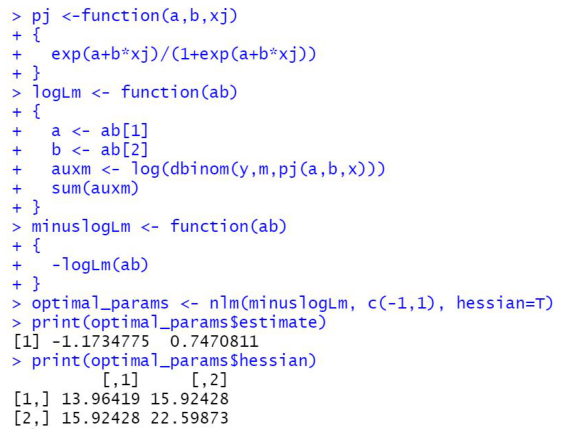

In [29]:
import matplotlib.pyplot as plt
image = plt.imread('images/rstudio_hessian_theOblig.jpg')
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(image)
plt.show()

Now that I have obtained the Hessian matrix, I can find $J_{\text{total}}^{-1}$ by inversing the obtained matrix. This will give me the covariance matrix, which contains the variance for both $\hat{a}$ and $\hat{b}$. For estimating the mean and standard deviation from my MCMC model, I will use Python and Numpy `mean` and `std`:

In [30]:
hessian = np.array([[13.96419, 15.92428], 
                    [15.92428, 22.59873]])
covariance_matrix = np.linalg.inv(hessian)  # aka our covariance matrix
sigma_a, sigma_b = np.sqrt(np.diag(covariance_matrix))

# estimates from maximum likelihood
print("----------Maximum likelihood estimates----------")
print(f"Maximum estimates: {round(a_hat, 4), round(b_hat, 4)}")
print(f"With standard deviation: {round(sigma_a, 4), round(sigma_b, 4)}")
print(f"Covariance matrix:\n{covariance_matrix}")
# estimates from MCMC
mean_a_mcmc, std_a_mcmc = np.mean(a_mcmc), np.std(a_mcmc)
mean_b_mcmc, std_b_mcmc = np.mean(b_mcmc), np.std(b_mcmc)
print("----------MCMC estimates----------")
print(f"MCMC estimates: {round(mean_a_mcmc, 4), round(mean_b_mcmc, 4)}")
print(f"With standard deviation: {round(std_a_mcmc, 4), round(std_b_mcmc, 4)}\n")

----------Maximum likelihood estimates----------
Maximum estimates: (-1.1735, 0.7471)
With standard deviation: (0.6038, 0.4746)
Covariance matrix:
[[ 0.36455288 -0.25688356]
 [-0.25688356  0.22526424]]
----------MCMC estimates----------
MCMC estimates: (-1.2376, 0.7918)
With standard deviation: (0.618, 0.4862)



The MCMC had a bit higher estimates than the 'Lazy Bayesian' approach. MCMC approach also have higher standard deviations than the maximum likelihood.

## (c)

_Use your simulations to produce a 90% pointwise credibility band around the estimated curve $\hat{p}(x)$_

The credibility band can be found by calculating $p_j$ for dosage level $x_j$ for all paramters $(a,b)$ found in the MCMC simulation. This is done for dosage level $x_1, ... , x_{10}$ (all 10 levels):

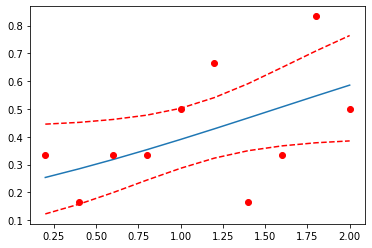

In [31]:
a_mcmc, b_mcmc = np.array(a_mcmc), np.array(b_mcmc)
y_res = [pj(a_mcmc, b_mcmc, xi) for xi in x]
quant = np.quantile(y_res, [0.05, 0.95], axis=1)

plt.plot(x, pj(mean_a_mcmc, mean_b_mcmc, x))
plt.plot(x, quant[0], 'r--')
plt.plot(x, quant[1], 'r--')
plt.plot(x, np.array(y)/(m), 'ro')
plt.show()

## (d)

_Give the posterior distribution of $p(x_{new})$ for the high dosage level $x_{new} = 2.50$ in terms of a histogram._


To calculate the posterior predictive distribution of the new value $x_{new}$, I will have to use what I allready know about my parameters $(a,b)$ based on the other $\textbf{x}$ observations. This information is found in my MCMC simulation. 

So, in the following code snippet, I will calcualte `sim` (the number of $(a,b)$'s I obtained from MCMC'ing) different $p_{new}$'s based on all $(a,b)$'s in my MCMC simulation.

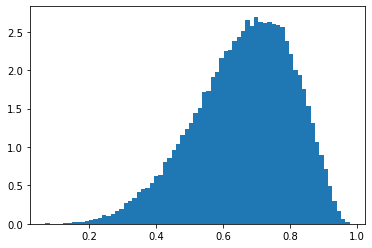

In [32]:
x_new = 2.5
# used my MCMC distribution to estimate the density
p_new = pj(a_mcmc, b_mcmc, x_new) 
plt.hist(p_new, bins=70, density=True)
plt.show()

_Discuss briefly the assumptions underlying your analysis._

My assumptions are that my `sim` numbers of observations for (a,b) are i.i.d. random variables. I also assume that $p(x_{new})$ is a logistic function given by $H(a + b x_{new}) = \frac{exp(a+b x_{new})}{1 + exp(a+b x_{new})}$. I also assume that the function $a+b x_i$ is in fact linear for all values of $x$ for the different $(a,b)$'s.

## (e)

_Find the predictive distribution for $y_{new}$, the number of $m=6$ Ratti norvegici experiencing Event A when the dosage is $x_{new}=2.50$_

I found the posterior distribution for $p(x_{new})$ in __(d)__. We were given that $y_{j} \sim bin(m, p(x_{j}))$. I will also use this function to calculate $y_{new}$.

So, for this exercise, I will simulate all points of $p(x_{new})$ in a random binomial, with $m$ observations. This will give me a random count of $0, 1, ..., 6$, with probabilities from $p(x_{new})$

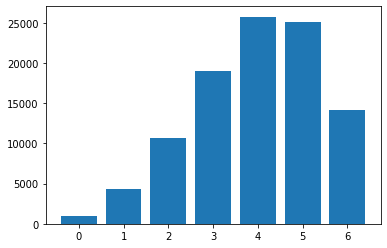

In [33]:
binom_x_new = stats.binom.rvs(m, p_new)
plt.bar(np.arange(0, m+1, 1), np.bincount(binom_x_new))
plt.show()

From the plot, it seems like that the expected number of rats that experience Event A when dosage level is $2.5$ will be between 3 and 5. 

## (f)

_Set up a second MCMC to compute the posterior distribution for $(a,b)$ when the prior is flat on $[-8,8] \times [0, 8]$_

Again, the target (or posterior) distribution is only based on the likelihood function (that is calcualted above), because the prior is constant and will cancel out when calculating $\frac{target(prop)}{target(old)}$. But, this time we do not want our $b$ parameter to exceed the interval $[0, 8]$ (now the lower limit is $0$ instead of $-8$). Therefore, we need to update our `if` statement from the first MCMC:

In [34]:
sim = 10**5
a_mcmc = [0]*sim
b_mcmc = [0]*sim

a_num = stats.norm.rvs(size=sim)
b_num = stats.norm.rvs(size=sim)

a_mcmc[0] = -1/2
b_mcmc[0] = 1/2

pracc = [0]*sim
ok = [0]*sim
push = 0.2

for i in range(1, sim):
    # looking back at what we have
    old_a = a_mcmc[i-1]
    old_b = b_mcmc[i-1] 
    # our proposial for the next step
    prop_a = np.copy(old_a) + push*a_num[i]  
    prop_b = np.copy(old_b) + push*b_num[i]
    
    pracc[i] = min([1, np.exp(logL([prop_a, prop_b]) - logL([old_a, old_b]))]) 
    # a and b must be inside of the interval, now with b [0, 8]
    if prop_a > 8 or prop_a < -8 or prop_b > 8 or prop_b < 0:
        pracc[i] = 0
    
    # ok=0 we keep old, 1 we keep the new one
    u = stats.uniform.rvs()
    ok[i] = 1*(u <= pracc[i]) 
    # update
    a_mcmc[i] = ok[i]*prop_a + (1-ok[i])*old_a  
    b_mcmc[i] = ok[i]*prop_b + (1-ok[i])*old_b

_Compute by simulation the 0.05, 0.50, 0.95 quantile points of the posterior distribution for the point so-called LD50 parameter_

LD50 is dosage $x_0$ where $50\%$ of the populations experience Event A. In other words, LD50 can be found where $Pr(A|x_0) = 0.50$. To find this distribution I used `sim` different $(a,b)$'s, from my second MCMC, to calulate $p_j$ with $10^3$ different dosage levels between $0$ and $5$. For each $(a,b)$ parameter value, I extracted the dosage level that gave the $p(x)$ value closest to $0.50$:

In [35]:
dosage = np.linspace(0,5,10**3)
LD50 = []
for a, b in zip(a_mcmc, b_mcmc):
    closest = np.argmin(abs(pj(a, b, dosage)-0.5))
    LD50.append(dosage[closest])
    
np.quantile(LD50, [0.05, 0.50, 0.95])

array([0.995996  , 1.54654655, 3.42842843])

I also found online that $LD50 = -\frac{b}{a}$. My second MCMC model have simulated `sim` different $(a,b)$'s, so will try to use this method aswelll:

In [36]:
LD50 = -(np.array(a_mcmc)/np.array(b_mcmc))
np.quantile(LD50, [0.05, 0.50, 0.95])

array([0.99618793, 1.54407636, 3.4301421 ])

Which yields approximately the same results. This means that LD50 will most likely be between $x=0.99$ and $x=3.43$.